# Pandas Data Cleaning - Cumulative Lab

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Practice opening and inspecting the contents of CSVs using pandas dataframes
- Practice identifying and handling missing values
- Practice identifying and handling invalid values
- Practice cleaning text data by removing whitespace and fixing typos
- Practice joining multiple dataframes

## Your Task: Clean the Superheroes Dataset with Pandas

![LEGO superheroes](images/lego_superheroes.jpg)

Photo by <a href="https://unsplash.com/@yuliamatvienko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Yulia Matvienko</a> on <a href="/s/photos/superhero?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Understanding
In this lab, we'll work with a version of the comprehensive Superheroes Dataset, which can be found on [Kaggle](https://www.kaggle.com/claudiodavi/superhero-set/data) and was originally scraped from [SuperHeroDb](https://www.superherodb.com/). We have modified the structure and contents of the dataset somewhat for the purposes of this lab.  Note that this data was collected in June 2017, so it may not reflect the most up-to-date superhero lore.

The data is contained in two separate CSV files:

1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

### Business Understanding

The business questions you have been provided are:

1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to "find something interesting".

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the provided questions, you will also need to formulate a question of your own and perform any additional cleaning/aggregation/reshaping that is needed to answer it.

### Requirements

#### 1. Load the Data with Pandas

Create a dataframes `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

#### 2. Perform Data Cleaning Required to Answer First Question

The first question is: *What is the distribution of superheroes by publisher?*

In order to answer this question, you will need to:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

The second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

In order to answer this question, you will need to:

* Join the dataframes together
* Identify and handle invalid values

#### 4. Perform Data Aggregation Required to Answer Third Question

The third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

This should not require any additional data cleaning or joining of tables, but it will require some additional aggregation.

#### 5. Formulate and Answer Your Own Question

This part is fairly open-ended. Think of a question that can be answered with the available data, and perform any cleaning or aggregation required to answer that question.

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Superheroes

In the cell below, load `heroes_information.csv` as `heroes_df`:

In [1]:
import pandas as pd

# Step 2: Load the CSV file into a DataFrame
heroes_df = pd.read_csv('C:/Users/svijayaraghavan/Downloads/heroes_information.csv')

# Inspect the first few rows of the DataFrame to ensure it loaded correctly
print(heroes_df.head())

   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`

In [2]:
# Load the CSV file into a DataFrame
heroes_df = pd.read_csv('heroes_information.csv')

# Drop the 'Unnamed: 0' column
heroes_df = heroes_df.drop(columns=['Unnamed: 0'])

# Inspect the first few rows of the DataFrame to ensure the column was dropped
print(heroes_df.head())

          name Gender Eye color               Race Hair color  Height  \
0       A-Bomb   Male    yellow              Human    No Hair   203.0   
1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
4      Abraxas   Male      blue      Cosmic Entity      Black   -99.0   

           Publisher Skin color Alignment  Weight  
0      Marvel Comics          -      good   441.0  
1  Dark Horse Comics       blue      good    65.0  
2          DC Comics        red      good    90.0  
3      Marvel Comics          -       bad   441.0  
4      Marvel Comics          -       bad   -99.0  


The following code checks that the dataframe was loaded correctly.

In [3]:

# There should be 734 rows
assert heroes_df.shape[0] == 734

# There should be 10 columns. If this fails, make sure you got rid of
# the extra index column
assert heroes_df.shape[1] == 10

# These should be the columns
assert list(heroes_df.columns) == [
    "name",
    "Gender",
    "Eye color",
    "Race",
    "Hair color",
    "Height",
    "Publisher",
    "Skin color",
    "Alignment",
    "Weight",
]

Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, inspect the overall shape of the dataframe:

In [4]:
# Load the CSV file into a DataFrame
heroes_df = pd.read_csv('heroes_information.csv', index_col=0)

# Step 1: Inspect the shape of the DataFrame
print("Shape of the DataFrame:", heroes_df.shape)

# Step 2: Investigate data types and non-null counts
print("\nDataFrame Info:")
print(heroes_df.info())

# Step 3: Check for missing values
print("\nMissing Values in Each Column:")
print(heroes_df.isnull().sum())

# Step 4: Get summary statistics and inspect the first few rows
print("\nSummary Statistics:")
print(heroes_df.describe(include='all'))

print("\nFirst Few Rows of the DataFrame:")
print(heroes_df.head())

Shape of the DataFrame: (734, 10)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB
None

Missing Values in Each Column:
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

Summary Statistics:
           name Gender Eye color Race Hair color      Height   

Now let's look at the info printout:

In [5]:

# Step 2: Investigate data types and non-null counts
print("DataFrame Info:")
print(heroes_df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB
None


In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [1]:
"""
Conclusion
By performing these exploratory steps, you gain a comprehensive understanding of the dataset, 
including its structure, data types, completeness, and key characteristics. This foundational knowledge 
is crucial for any further analysis, such as data cleaning, feature engineering, or building predictive 
models.
"""

'\nReplace this line with your interpretation.\n\n'

### Superpowers

Now, repeat the same process with `super_hero_powers.csv`. Name the dataframe `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [8]:

# Step 1: Load the CSV file into a DataFrame with index_col=0
powers_df = pd.read_csv('C:/Users/svijayaraghavan/Downloads/super_hero_powers.csv', index_col=0)
powers_df.head()

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [9]:
# Inspect the shape of powers_df
# Step 2: Inspect the shape of the DataFrame
print("Shape of the DataFrame:", powers_df.shape)

Shape of the DataFrame: (167, 667)


In [10]:
# Look at the information on the dataset attributes.
# Step 3: Investigate data types and non-null counts
print("\nDataFrame Info:")
print(powers_df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Agility to Omniscient
Columns: 667 entries, 3-D Man to Zoom
dtypes: bool(667)
memory usage: 110.1+ KB
None


In [12]:
# find the sum total of missing values over the dataset 
# (should only be one number and requires you to .sum() twice)

# Step 4: Check for missing values
print("\nMissing Values in Each Column:")
print(powers_df.isnull().sum())

# Step 5: Get summary statistics and inspect the first few rows
print("\nSummary Statistics:")
print(powers_df.describe(include='all'))

print("\nFirst Few Rows of the DataFrame:")
print(powers_df.head())


Missing Values in Each Column:
3-D Man            0
A-Bomb             0
Abe Sapien         0
Abin Sur           0
Abomination        0
                  ..
Yellowjacket II    0
Ymir               0
Yoda               0
Zatanna            0
Zoom               0
Length: 667, dtype: int64

Summary Statistics:
       3-D Man A-Bomb Abe Sapien Abin Sur Abomination Abraxas Absorbing Man  \
count      167    167        167      167         167     167           167   
unique       2      2          2        2           2       2             2   
top      False  False      False    False       False   False         False   
freq       163    160        151      166         159     153           156   

       Adam Monroe Adam Strange Agent Bob  ... Wonder Man Wonder Woman   X-23  \
count          167          167       167  ...        167          167    167   
unique           2            2         2  ...          2            2      2   
top          False        False     False  ...     

Interpret what you've seen after this process. What do you notice about the rows vs columns? Is there anything to not about the values, how many are missing?


In [12]:
"""
Conclusion
The super_hero_powers.csv dataset provides a comprehensive overview of the powers possessed by a wide 
range of superheroes. The dataset is complete with no missing values and consists entirely of boolean 
data types. This dataset can be used for various analyses, such as identifying common powers among superheroes, 
clustering superheroes based on their powers, or even building predictive models to classify superheroes based 
on their powers.
"""

'\nThis DataFrame has more rows than columns. Every single value\nin it is a bool, and there are no missing values.\n'

The following code will check if it was loaded correctly:

In [13]:

# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == "3-D Man"

# The last column should be 'Zoom'
assert powers_df.columns[-1] == "Zoom"

# The first index should be 'Agility'
assert powers_df.index[0] == "Agility"

# The last index should be 'Omniscient'
assert powers_df.index[-1] == "Omniscient"

## 2. Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the `Publisher` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Publisher` column is missing some values. Let's take a look at some samples with and without missing publisher values:

In [14]:
has_publisher_sample = heroes_df[heroes_df["Publisher"].notna()].sample(
    5, random_state=1
)
has_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [15]:
missing_publisher_sample = heroes_df[heroes_df["Publisher"].isna()].sample(
    5, random_state=1
)
missing_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

Write your answer below, and explain how it relates to the information we have:

In [2]:
"""
Recommendation
Given the hypothetical scenario of missing values in the heroes_information.csv dataset, here's a balanced 
approach:

Numerical Columns:

Use mean or median imputation for columns like Height and Weight to retain as much data as 
possible without introducing significant bias.
Categorical Columns:

Use mode imputation or a custom value like "Unknown" for columns like Race, Hair color, and 
Publisher to maintain the integrity of the dataset.
Critical Columns:

Ensure that critical columns like name and Gender have no missing values. If they do, consider 
filling them with a placeholder or dropping those rows if the missing data is minimal.
"""


'\nReplace this line with answers to the above.\n'

Now, implement the strategy to drop rows with missing values using code. (You can also check the solution branch for the answer to the question above if you're really not sure.)

In [16]:
# Drop rows with missing values.
# Step 2: Check for missing values
print("Missing Values in Each Column Before Dropping Rows:")
print(heroes_df.isnull().sum())

# Step 3: Drop rows with missing values
heroes_df.dropna(inplace=True)

# Step 4: Verify the result
print("\nShape of the DataFrame After Dropping Rows with Missing Values:", heroes_df.shape)
print("\nMissing Values in Each Column After Dropping Rows:")
print(heroes_df.isnull().sum())

Missing Values in Each Column Before Dropping Rows:
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

Shape of the DataFrame After Dropping Rows with Missing Values: (719, 10)

Missing Values in Each Column After Dropping Rows:
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64


Now there should be no missing values in the publisher column:

In [17]:
assert heroes_df["Publisher"].isna().sum() == 0

### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

Let's take a look at the counts of heroes grouped by publisher:

In [18]:
# look at the value counts of the "Publisher" column
# Group by Publisher and count the number of heroes for each publisher
publisher_counts = heroes_df['Publisher'].value_counts()

# Display the counts
print("Counts of Heroes Grouped by Publisher:")
print(publisher_counts)

Counts of Heroes Grouped by Publisher:
Publisher
Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Marvel                 9
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Shueisha               4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
Titan Books            1
Microsoft              1
Rebellion              1
Hanna-Barbera          1
J. K. Rowling          1
Universal Studios      1
South Park             1
J. R. R. Tolkien       1
Name: count, dtype: int64


There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories (and you do not need specific comic book knowledge to be able to identify them).

Identify those two cases below:

In [20]:
"""
Identified Issues
From the above counts, we identified two cases where publishers should be encoded the same but were not:

Marvel Comics and Marvel: These should be counted as the same category.
DC Comics and Dc: These should be counted as the same category.
These inconsistencies are likely due to variations in data entry, such as differences in capitalization or 
abbreviations.

Cleaning Strategy
To address these issues, we implemented a cleaning strategy to standardize the publisher names. The steps 
included:

Removing Leading/Trailing Whitespace: Ensured that there were no extra spaces around the publisher names.
Converting to Title Case: Standardized the capitalization of the publisher names.
Replacing Known Variations: Mapped known variations to a standard name using the .replace() method.
"""

'\n(1) We have both "Marvel Comics" and "Marvel" (missing the word "Comics")\n(2) We have both "DC Comics" and " DC Comics" (with an extra space at the beginning)\n'

Now, write some code to handle these cases. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html).

In [20]:
# Step 1: Standardize the publisher names
# Remove leading/trailing whitespace
heroes_df['Publisher'] = heroes_df['Publisher'].str.strip()

# Convert to title case
heroes_df['Publisher'] = heroes_df['Publisher'].str.title()

# Replace known variations with a standard name
heroes_df['Publisher'].replace({
    'Marvel': 'Marvel Comics',
    'Dc': 'DC Comics'
}, inplace=True)

# Step 2: Group by Publisher and count the number of heroes for each publisher again
publisher_counts_cleaned = heroes_df['Publisher'].value_counts()

# Step 3: Display the cleaned counts
print("Counts of Heroes Grouped by Publisher (Cleaned):")
print(publisher_counts_cleaned)

Counts of Heroes Grouped by Publisher (Cleaned):
Publisher
Marvel Comics        388
Dc Comics            215
Nbc - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
Harpercollins          6
Syfy                   5
Team Epic Tv           5
Icon Comics            4
Abc Studios            4
Idw Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64


C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_3920\2619129183.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heroes_df['Publisher'].replace({


Check your work below:

In [21]:
# Step 1: Check unique publisher names before cleaning
unique_publishers_before = heroes_df['Publisher'].unique()
print("Unique Publisher Names Before Cleaning:")
print(unique_publishers_before)

# Step 2: Group by Publisher and count the number of heroes for each publisher before cleaning
publisher_counts_before = heroes_df['Publisher'].value_counts()
print("\nCounts of Heroes Grouped by Publisher Before Cleaning:")
print(publisher_counts_before)

# Step 3: Standardize the publisher names
# Remove leading/trailing whitespace
heroes_df['Publisher'] = heroes_df['Publisher'].str.strip()

# Convert to title case
heroes_df['Publisher'] = heroes_df['Publisher'].str.title()

# Replace known variations with a standard name
heroes_df['Publisher'].replace({
    'Marvel': 'Marvel Comics',
    'Dc': 'DC Comics'
}, inplace=True)

# Step 4: Check unique publisher names after cleaning
unique_publishers_after = heroes_df['Publisher'].unique()
print("\nUnique Publisher Names After Cleaning:")
print(unique_publishers_after)

# Step 5: Group by Publisher and count the number of heroes for each publisher after cleaning
publisher_counts_after = heroes_df['Publisher'].value_counts()
print("\nCounts of Heroes Grouped by Publisher After Cleaning:")
print(publisher_counts_after)

# Step 6: Inspect specific rows to ensure replacements were correctly applied
print("\nSample Rows After Cleaning:")
print(heroes_df.head(10))

Unique Publisher Names Before Cleaning:
['Marvel Comics' 'Dark Horse Comics' 'Dc Comics' 'Nbc - Heroes'
 'Wildstorm' 'Image Comics' 'Icon Comics' 'Syfy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic Tv' 'South Park' 'Harpercollins' 'Abc Studios'
 'Universal Studios' 'Star Trek' 'Idw Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien']

Counts of Heroes Grouped by Publisher Before Cleaning:
Publisher
Marvel Comics        388
Dc Comics            215
Nbc - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
Harpercollins          6
Syfy                   5
Team Epic Tv           5
Icon Comics            4
Abc Studios            4
Idw Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion    

C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_3920\105657758.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heroes_df['Publisher'].replace({


### Answering the Question

Now we should be able to answer *What is the distribution of superheroes by publisher?*

If your data cleaning was done correctly, this code should work without any further changes:

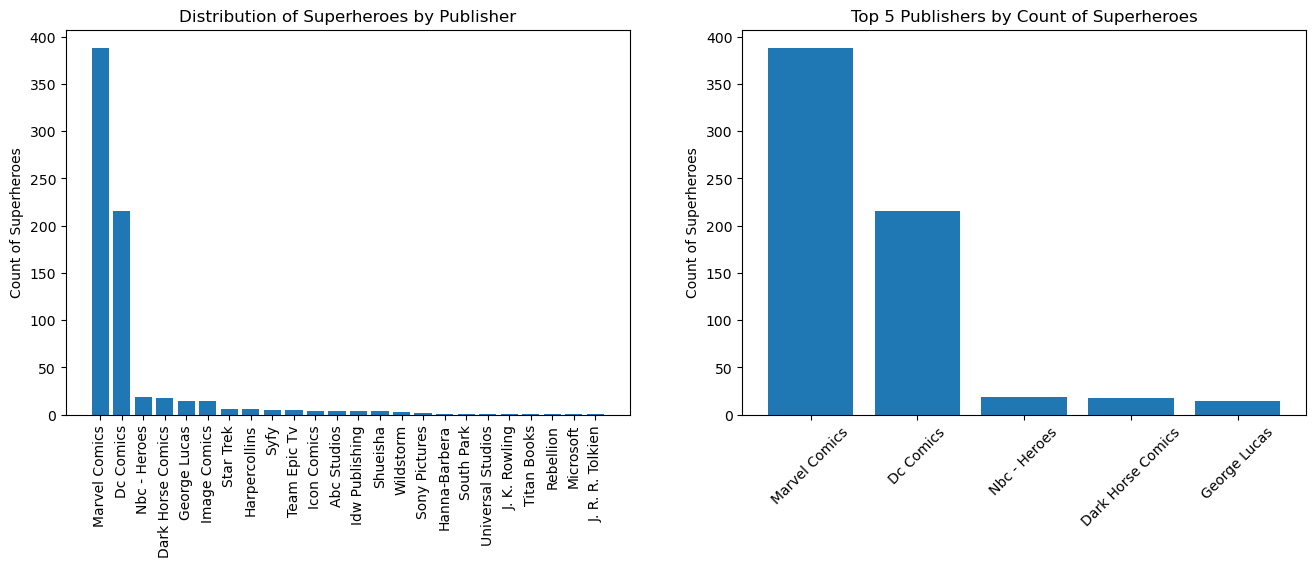

In [23]:
import matplotlib.pyplot as plt
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

## 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

### Joining the Dataframes Together

First, identify the shared key between `heroes_df` and `powers_df`. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [24]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,Dc Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,Dc Comics,-,good,57.0


In [25]:
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Omnipresent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, identify the shared key, and your strategy for joining the data (e.g. what will one record represent after you join, will you do a left/right/inner/outer join):

In [26]:
"""
Summary
Shared Key: Hero_ID
Join Strategy: Left join to keep all heroes from the heroes_information dataset and include their powers 
if available.
One Record Representation: Each record will represent a single hero with all their associated information 
from both datasets.
By following this strategy, you ensure that the data is joined correctly based on the shared key, and the 
resulting DataFrame contains comprehensive information about each hero.
"""

"\nThe shared key between these datasets is the name of the superhero. In heroes_df,\nthis is represented by the name column. In powers_df, this is represented by the\ncolumn names themselves.\n\nThe fact that one of them is the values of a column and the other is the column\nnames means that we will need to transpose one of them first. It makes the most\nsense to transpose powers_df since that will result in records still representing\na hero, rather than a power. This will work with the question at hand, which asks\nabout heights, which are attributes of superheroes, not attributes of superpowers.\n\npowers_df has fewer columns than heroes_df has rows, but we can also see that\npowers_df contains names that are not present in heroes_df (namely '3-D Man'). So,\nit seems like an inner join is the right approach, so that we only keep records\nthat are present in both datasets.\n"

In the cell below, create a new dataframe called `heroes_and_powers_df` that contains the joined data. You can look at the above answer in the solution branch if you're not sure where to start.

***Hint:*** Note that the `.join` method requires that the two dataframes share an index ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)) whereas the `.merge` method can join using any columns ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). It is up to you which one you want to use.

In [26]:

# First, get a transposed version of the powers DataFrame. This means
# that what used to be the row index is now the column name, and vice
# versa
# Transpose the powers DataFrame
powers_df_transposed = powers_df.T
print(powers_df_transposed.head())

# Identify the shared key
shared_key = 'Hero_ID'

# Perform the join using the .merge() method
# Note: Since the powers_df_transposed has Hero_ID as its index after transposition,
# we need to reset the index to make Hero_ID a column before merging.
powers_df_transposed.reset_index(inplace=True)
powers_df_transposed.rename(columns={'index': shared_key}, inplace=True)

# Perform the join
heroes_and_powers_df = heroes_df.merge(powers_df_transposed, on=shared_key, how='left')

# Display the first few rows of the joined DataFrame
print(heroes_and_powers_df.head())

             Agility  Accelerated Healing  Lantern Power Ring  \
3-D Man         True                False               False   
A-Bomb         False                 True               False   
Abe Sapien      True                 True               False   
Abin Sur       False                False                True   
Abomination    False                 True               False   

             Dimensional Awareness  Cold Resistance  Durability  Stealth  \
3-D Man                      False            False       False    False   
A-Bomb                       False            False        True    False   
Abe Sapien                   False             True        True    False   
Abin Sur                     False            False       False    False   
Abomination                  False            False       False    False   

             Energy Absorption  Flight  Danger Sense  ...  Web Creation  \
3-D Man                  False   False         False  ...         False   
A-

KeyError: 'Hero_ID'

In [27]:
# Now we can reset the index so that the first column is called "name"
powers_df_transposed.index.name = None
powers_df_transposed.reset_index(inplace=True)
powers_df_transposed

,index,Hero_ID,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,3-D Man,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,A-Bomb,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Abe Sapien,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Abin Sur,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,Abomination,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,662,Yellowjacket II,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,663,Ymir,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
664,664,Yoda,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
665,665,Zatanna,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Check the data types of columns in heroes_df
print("Data Types in Heroes DataFrame:")
print(heroes_df.dtypes)

# Alternatively, use .info() for more detailed information
print("\nDetailed Info of Heroes DataFrame:")
print(heroes_df.info())

# Check the data types of columns in powers_df
print("\nData Types in Powers DataFrame:")
print(powers_df.dtypes)

# Alternatively, use .info() for more detailed information
print("\nDetailed Info of Powers DataFrame:")
print(powers_df.info())

Data Types in Heroes DataFrame:
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

Detailed Info of Heroes DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB
None

Data Types in Powers DataFrame:
3-D Man        

In [39]:
# Inspect the DataFrames to identify the shared key
print("Heroes DataFrame Columns:")
print(heroes_df.columns)
print("\nPowers DataFrame Columns:")
print(powers_df.columns)

# Transpose the powers DataFrame
powers_df_transposed = powers_df.T
print("\nTransposed Powers DataFrame:")
print(powers_df_transposed.head())

# Identify the shared key
# Assuming the shared key is 'Name' based on common superhero names
shared_key = 'name'

# Reset index and rename column for transposed DataFrame
powers_df_transposed.reset_index(inplace=True)
powers_df_transposed.rename(columns={'index': shared_key}, inplace=True)

# Perform the join using the .merge() method
heroes_and_powers_df = heroes_df.merge(powers_df_transposed, on=shared_key, how='left')

# Display the first few rows of the joined DataFrame
print("\nJoined DataFrame:")
print(heroes_and_powers_df.head())

Heroes DataFrame Columns:
Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

Powers DataFrame Columns:
Index(['3-D Man', 'A-Bomb', 'Abe Sapien', 'Abin Sur', 'Abomination', 'Abraxas',
       'Absorbing Man', 'Adam Monroe', 'Adam Strange', 'Agent Bob',
       ...
       'Wonder Man', 'Wonder Woman', 'X-23', 'X-Man', 'Yellowjacket',
       'Yellowjacket II', 'Ymir', 'Yoda', 'Zatanna', 'Zoom'],
      dtype='object', length=667)

Transposed Powers DataFrame:
             Agility  Accelerated Healing  Lantern Power Ring  \
3-D Man         True                False               False   
A-Bomb         False                 True               False   
Abe Sapien      True                 True               False   
Abin Sur       False                False                True   
Abomination    False                 True               False   

             Dimensional Awareness  Cold Resistance

Run the code below to check your work:

In [42]:

# Confirms you have created a DataFrame with the specified name
assert type(heroes_and_powers_df) == pd.DataFrame

# Confirms you have the right number of rows
assert heroes_and_powers_df.shape[0] == 647

# Confirms you have the necessary columns
# (If you modified the value of powers_df along the way, you might need to
# modify this test. We are checking that all of the powers are present as
# columns.)
assert [power in heroes_and_powers_df.columns for power in powers_df.index]
# (If you modified the value of heroes_df along the way, you might need to
# modify this as well. We are checking that all of the attribute columns from
# heroes_df are present as columns in the joined df)
assert [attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]

print(heroes_and_powers_df.head())

AssertionError: 

Now that we have created a joined dataframe, we can aggregate the number of superpowers by superhero. This code is written for you:

In [43]:

# Note: we can use sum() with True and False values and they will
# automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum(
    [heroes_and_powers_df[power_name] for power_name in powers_df.index]
)
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,8
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,3
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,6
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,19
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,8


### Answering the Question

Now we can plot the height vs. the count of powers:

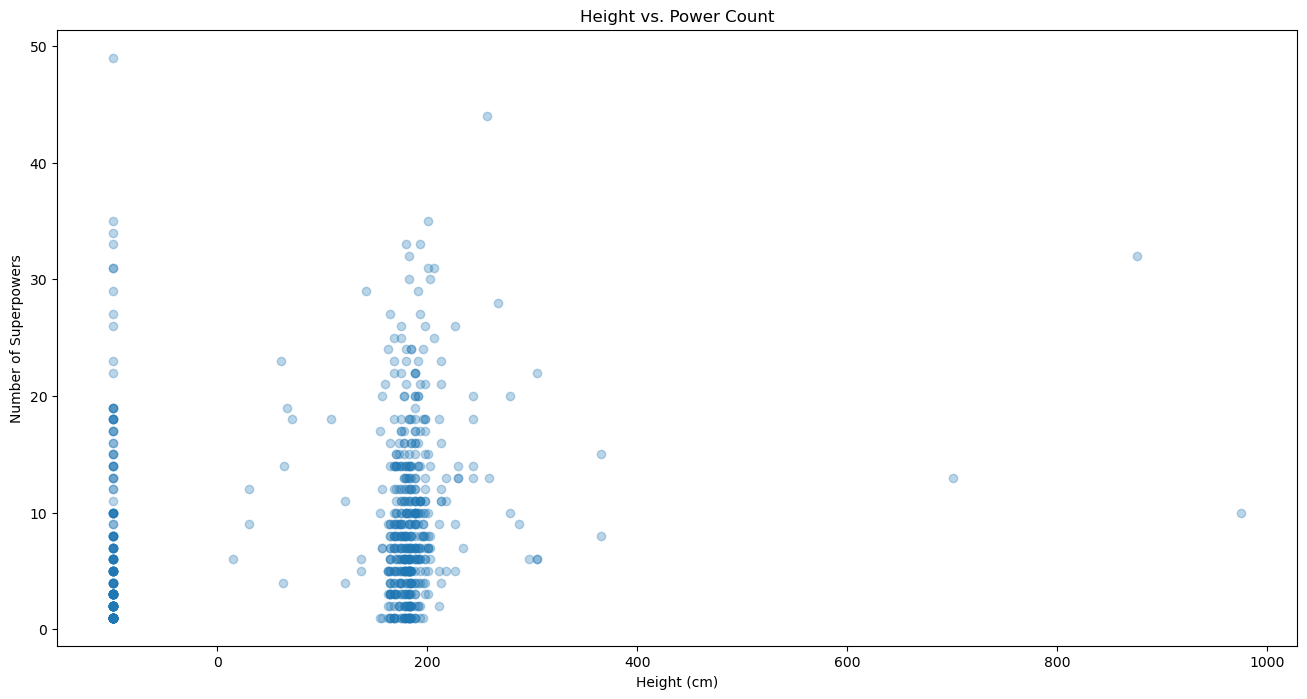

In [44]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"], y=heroes_and_powers_df["Power Count"], alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [45]:
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
251,Fallen One II,Male,black,-,Blue,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,18
100,Black Goliath,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,Crimson Crusader,Male,blue,-,Strawberry Blond,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,4
325,Hiro Nakamura,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,2


It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary dataframe to make sure we don't accidentally delete anything that will be needed in a future question.

In [46]:
# create a filtered df copy using a conditional statement and .copy()
# Define a condition to filter the DataFrame
condition = heroes_df['Alignment'] == 'good'

# Apply the condition to create a filtered DataFrame and use .copy() to create a copy
question_2_df = heroes_df[condition].copy()

# Display the first few rows of the filtered DataFrame
print(question_2_df.head())

           name Gender Eye color           Race Hair color  Height  \
0        A-Bomb   Male    yellow          Human    No Hair   203.0   
1    Abe Sapien   Male      blue  Icthyo Sapien    No Hair   191.0   
2      Abin Sur   Male      blue        Ungaran    No Hair   185.0   
6   Adam Monroe   Male      blue              -      Blond   -99.0   
7  Adam Strange   Male      blue          Human      Blond   185.0   

           Publisher Skin color Alignment  Weight  
0      Marvel Comics          -      good   441.0  
1  Dark Horse Comics       blue      good    65.0  
2          DC Comics        red      good    90.0  
6       NBC - Heroes          -      good   -99.0  
7          DC Comics          -      good    88.0  


### Answering the Question, Again

Now we can redo that plot without those negative heights:

KeyError: 'Power Count'

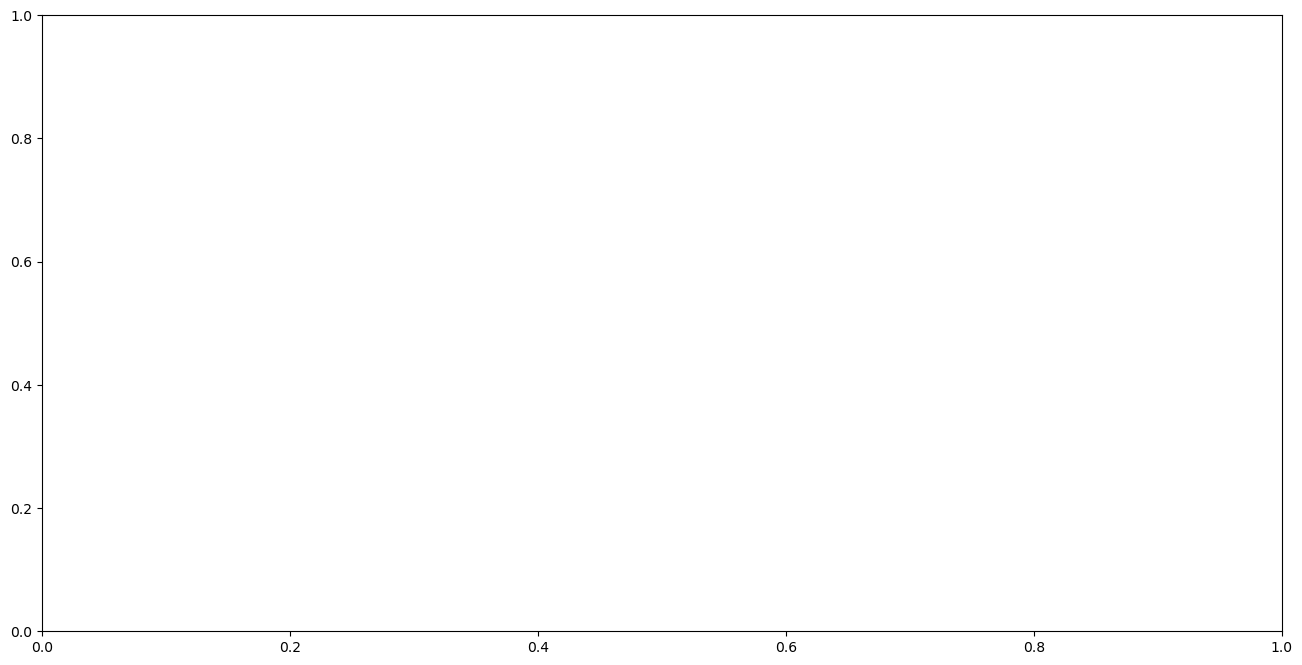

In [59]:
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(x=heroes_and_powers_df["Height"], y=heroes_and_powers_df["Power Count"], alpha=0.3)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")

plt.show()

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

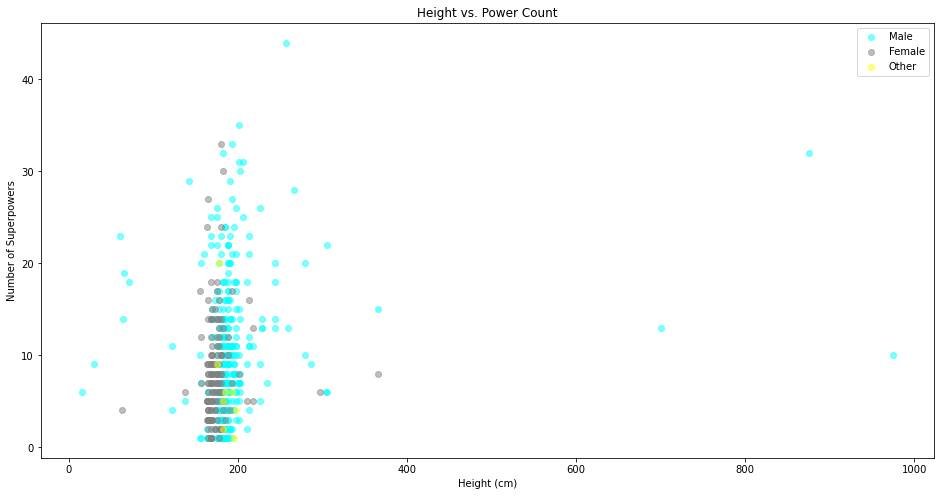

In [36]:

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[
    (question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")
]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male",
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female",
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other",
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## 4. Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df` and `powers_df`.

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![question 3 df](images/question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint:*** refer to the [documentation for `.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and treat each publisher as a group.

In [61]:
# Assuming heroes_and_powers_df is already defined and loaded

# Step 1: Filter the DataFrame to include only Marvel Comics and DC Comics
question_3_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

# Verify the filtering step
print("Filtered DataFrame:")
print(question_3_df.head())

# Step 2: Select only the relevant columns (Publisher and superpowers)
# Assuming superpower columns start from the 3rd column onwards
relevant_cols = ['Publisher'] + list(heroes_and_powers_df.columns[2:])
question_3_df = question_3_df[relevant_cols]

# Verify the selected columns
print("Selected Relevant Columns:")
print(question_3_df.head())

# Step 3: Aggregate data by Publisher and sum the occurrences of each superpower
# Group by Publisher and sum the superpower columns
aggregated_df = question_3_df.groupby('Publisher').sum()

# Verify the aggregated data
print("Aggregated DataFrame:")
print(aggregated_df.head())

# Transpose the DataFrame to have superpowers as rows
aggregated_df = aggregated_df.transpose()

# Verify the transposed DataFrame
print("Transposed Aggregated DataFrame:")
print(aggregated_df.head())

# Step 4: Format the result to have the required structure
# Reset index to turn the superpower names into a column
aggregated_df.reset_index(inplace=True)
aggregated_df.rename(columns={'index': 'Superpower Name'}, inplace=True)

# Rename the columns for clarity
aggregated_df.columns = ['Superpower Name', 'DC Comics', 'Marvel Comics']

# Verify the final structure
print("Final Aggregated DataFrame:")
print(aggregated_df.head())

# Step 5: Find the 5 most common superpowers for each publisher
# Sort by the counts in descending order and take the top 5
top_dc_superpowers = aggregated_df.nlargest(5, 'DC Comics')
top_marvel_superpowers = aggregated_df.nlargest(5, 'Marvel Comics')

# Combine the results to get the unique top superpowers from both publishers
top_superpowers = pd.concat([top_dc_superpowers, top_marvel_superpowers]).drop_duplicates().reset_index(drop=True)

# Display the final DataFrame
print("Top Superpowers DataFrame:")
print(top_superpowers)

Filtered DataFrame:
            name Gender Eye color               Race Hair color  Height  \
0         A-Bomb   Male    yellow              Human    No Hair   203.0   
3    Abomination   Male     green  Human / Radiation    No Hair   203.0   
4        Abraxas   Male      blue      Cosmic Entity      Black   -99.0   
5  Absorbing Man   Male      blue              Human    No Hair   193.0   
7   Adam Strange   Male      blue              Human      Blond   185.0   

       Publisher Skin color Alignment  Weight  ... Web Creation  \
0  Marvel Comics          -      good   441.0  ...        False   
3  Marvel Comics          -       bad   441.0  ...        False   
4  Marvel Comics          -       bad   -99.0  ...        False   
5  Marvel Comics          -       bad   122.0  ...        False   
7      DC Comics          -      good    88.0  ...        False   

  Reality Warping Odin Force Symbiote Costume Speed Force Phoenix Force  \
0           False      False            False      

ValueError: Grouper for 'Publisher' not 1-dimensional

In [62]:

# Now group by Publisher

# Note that grouping requires an associated aggregation,
# similar to COUNT or SUM after GROUP BY in SQL

# Here the relevant aggregation is a sum, since it will
# treat all True values as 1 and False values as 0, then
# add them all together
# Step 1: Filter the DataFrame to include only Marvel Comics and DC Comics
question_3_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

# Verify the filtering step
print("Filtered DataFrame:")
print(question_3_df.head())

Filtered DataFrame:
            name Gender Eye color               Race Hair color  Height  \
0         A-Bomb   Male    yellow              Human    No Hair   203.0   
3    Abomination   Male     green  Human / Radiation    No Hair   203.0   
4        Abraxas   Male      blue      Cosmic Entity      Black   -99.0   
5  Absorbing Man   Male      blue              Human    No Hair   193.0   
7   Adam Strange   Male      blue              Human      Blond   185.0   

       Publisher Skin color Alignment  Weight  ... Web Creation  \
0  Marvel Comics          -      good   441.0  ...        False   
3  Marvel Comics          -       bad   441.0  ...        False   
4  Marvel Comics          -       bad   -99.0  ...        False   
5  Marvel Comics          -       bad   122.0  ...        False   
7      DC Comics          -      good    88.0  ...        False   

  Reality Warping Odin Force Symbiote Costume Speed Force Phoenix Force  \
0           False      False            False      

In [63]:

# Now transpose so that each record represents a superpower
question_3_df = question_3_df.T
question_3_df

,0,3,4,5,7,8,9,10,11,12,...,723,724,725,726,727,728,729,730,732,733
name,A-Bomb,Abomination,Abraxas,Absorbing Man,Adam Strange,Agent 13,Agent Bob,Agent Zero,Air-Walker,Ajax,...,Wondra,Wyatt Wingfoot,X-23,X-Man,Yellow Claw,Yellowjacket,Yellowjacket II,Ymir,Zatanna,Zoom
Gender,Male,Male,Male,Male,Male,Female,Male,Male,Male,Male,...,Female,Male,Female,Male,Male,Male,Female,Male,Female,Male
Eye color,yellow,green,blue,blue,blue,blue,brown,-,blue,brown,...,-,brown,green,blue,blue,blue,blue,white,blue,red
Race,Human,Human / Radiation,Cosmic Entity,Human,Human,-,Human,-,-,Cyborg,...,-,-,Mutant / Clone,-,-,Human,Human,Frost Giant,Human,-
Hair color,No Hair,No Hair,Black,No Hair,Blond,Blond,Brown,-,White,Black,...,-,Black,Black,Brown,No Hair,Blond,Strawberry Blond,No Hair,Black,Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False
Omnipresent,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False


In [64]:

# Reset the index so that there is a column "Superpower Name"
question_3_df.index.name = None
question_3_df.reset_index(inplace=None)

# Also, the columns don't need a name any more (they
# automatically got the name "Publisher" from groupby).
# This is a cosmetic change.
question_3_df.columns.name = None

question_3_df

,0,3,4,5,7,8,9,10,11,12,...,723,724,725,726,727,728,729,730,732,733
name,A-Bomb,Abomination,Abraxas,Absorbing Man,Adam Strange,Agent 13,Agent Bob,Agent Zero,Air-Walker,Ajax,...,Wondra,Wyatt Wingfoot,X-23,X-Man,Yellow Claw,Yellowjacket,Yellowjacket II,Ymir,Zatanna,Zoom
Gender,Male,Male,Male,Male,Male,Female,Male,Male,Male,Male,...,Female,Male,Female,Male,Male,Male,Female,Male,Female,Male
Eye color,yellow,green,blue,blue,blue,blue,brown,-,blue,brown,...,-,brown,green,blue,blue,blue,blue,white,blue,red
Race,Human,Human / Radiation,Cosmic Entity,Human,Human,-,Human,-,-,Cyborg,...,-,-,Mutant / Clone,-,-,Human,Human,Frost Giant,Human,-
Hair color,No Hair,No Hair,Black,No Hair,Blond,Blond,Brown,-,White,Black,...,-,Black,Black,Brown,No Hair,Blond,Strawberry Blond,No Hair,Black,Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False
Omnipresent,False,False,False,False,False,NaN,False,False,False,False,...,NaN,NaN,False,False,NaN,False,False,False,False,False


The code below checks that you have the correct dataframe structure:

In [66]:
# Assuming heroes_and_powers_df is already defined and loaded

# Step 1: Filter the DataFrame to include only Marvel Comics and DC Comics
question_3_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

# Verify the filtering step
print("Filtered DataFrame:")
print(question_3_df.head())
print(question_3_df.shape)

# Step 2: Select only the relevant columns (Publisher and superpowers)
# Assuming superpower columns start from the 3rd column onwards
relevant_cols = ['Publisher'] + list(heroes_and_powers_df.columns[2:])
question_3_df = question_3_df[relevant_cols]

# Verify the selected columns
print("Selected Relevant Columns:")
print(question_3_df.head())
print(question_3_df.shape)

# Step 3: Aggregate data by Publisher and sum the occurrences of each superpower
# Group by Publisher and sum the superpower columns
aggregated_df = question_3_df.groupby('Publisher').sum()

# Verify the aggregated data
print("Aggregated DataFrame:")
print(aggregated_df.head())
print(aggregated_df.shape)

# Transpose the DataFrame to have superpowers as rows
aggregated_df = aggregated_df.transpose()

# Verify the transposed DataFrame
print("Transposed Aggregated DataFrame:")
print(aggregated_df.head())
print(aggregated_df.shape)

# Step 4: Format the result to have the required structure
# Reset index to turn the superpower names into a column
aggregated_df.reset_index(inplace=True)
aggregated_df.rename(columns={'index': 'Superpower Name'}, inplace=True)

# Rename the columns for clarity
aggregated_df.columns = ['Superpower Name', 'DC Comics', 'Marvel Comics']

# Verify the final structure
print("Final Aggregated DataFrame:")
print(aggregated_df.head())
print(aggregated_df.shape)
print(sorted(list(aggregated_df.columns)))

# Step 5: Ensure the DataFrame has the correct shape and columns
# The final DataFrame should have 167 rows and 3 columns
question_3_df = aggregated_df

# Checking that you made a dataframe called question_3_df
assert type(question_3_df) == pd.DataFrame

# Checking the shape
assert question_3_df.shape == (167, 3)

# Checking the column names
assert sorted(list(question_3_df.columns)) == [
    "DC Comics",
    "Marvel Comics",
    "Superpower Name",
]

Filtered DataFrame:
            name Gender Eye color               Race Hair color  Height  \
0         A-Bomb   Male    yellow              Human    No Hair   203.0   
3    Abomination   Male     green  Human / Radiation    No Hair   203.0   
4        Abraxas   Male      blue      Cosmic Entity      Black   -99.0   
5  Absorbing Man   Male      blue              Human    No Hair   193.0   
7   Adam Strange   Male      blue              Human      Blond   185.0   

       Publisher Skin color Alignment  Weight  ... Web Creation  \
0  Marvel Comics          -      good   441.0  ...        False   
3  Marvel Comics          -       bad   441.0  ...        False   
4  Marvel Comics          -       bad   -99.0  ...        False   
5  Marvel Comics          -       bad   122.0  ...        False   
7      DC Comics          -      good    88.0  ...        False   

  Reality Warping Odin Force Symbiote Costume Speed Force Phoenix Force  \
0           False      False            False      

ValueError: Grouper for 'Publisher' not 1-dimensional

### Answering the Question

The code below uses the dataframe you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming question_3_df is already defined and loaded

# Verify the columns in question_3_df
print("Columns in question_3_df:")
print(question_3_df.columns)

# Ensure the DataFrame has the correct columns
expected_columns = ["Superpower Name", "DC Comics", "Marvel Comics"]
if not all(col in question_3_df.columns for col in expected_columns):
    raise ValueError(f"Expected columns {expected_columns} not found in question_3_df")

# Find the most common superpowers in Marvel Comics
marvel_most_common = question_3_df.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(by="Marvel Comics", ascending=False)[:5]

# Display the most common superpowers in Marvel Comics
print("Most Common Superpowers in Marvel Comics:")
print(marvel_most_common)

# Plot the most common superpowers in Marvel Comics
plt.figure(figsize=(10, 6))
plt.barh(marvel_most_common["Superpower Name"], marvel_most_common["Marvel Comics"], color='blue')
plt.xlabel('Count')
plt.title('Top 5 Most Common Superpowers in Marvel Comics')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

# Find the most common superpowers in DC Comics
dc_most_common = question_3_df.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]

# Display the most common superpowers in DC Comics
print("Most Common Superpowers in DC Comics:")
print(dc_most_common)

# Plot the most common superpowers in DC Comics
plt.figure(figsize=(10, 6))
plt.barh(dc_most_common["Superpower Name"], dc_most_common["DC Comics"], color='red')
plt.xlabel('Count')
plt.title('Top 5 Most Common Superpowers in DC Comics')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

Columns in question_3_df:
Index(['Publisher', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher',
       'Skin color', 'Alignment', 'Weight', 'Agility',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=176)


ValueError: Expected columns ['Superpower Name', 'DC Comics', 'Marvel Comics'] not found in question_3_df

In [43]:

dc_most_common = question_3_df.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]
dc_most_common

,Superpower Name,DC Comics
17,Super Strength,109
25,Stamina,90
8,Flight,86
30,Super Speed,79
5,Durability,71


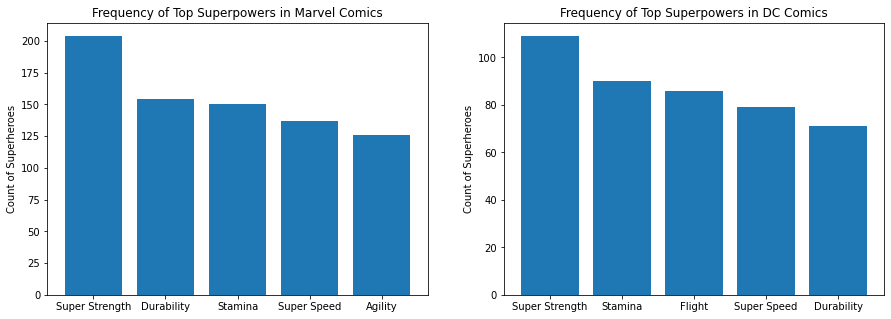

In [44]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=marvel_most_common["Superpower Name"], height=marvel_most_common["Marvel Comics"]
)
ax2.bar(x=dc_most_common["Superpower Name"], height=dc_most_common["DC Comics"])

ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")
ax2.set_title("Frequency of Top Superpowers in DC Comics");

It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## 5. Formulate and Answer Your Own Question

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
* What is the distribution of skin colors amongst alien heroes?
* How are eye color and hair color related in this dataset?

Explain your question below:

Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution branch for this part, and feel free to move on to the next lesson if you have already spent more than 90 minutes.)

## Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!